In [1]:
#Prevendo o Costumer Churn em uma Telefônica

In [2]:
#Importação de pacotes primários

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Lendo os arquivos do projeto

dataset_treino = pd.read_csv ('telecom_treino.csv')
dataset_teste = pd.read_csv ('telecom_teste.csv')


In [4]:
#Primeiras linhas do dataset de treino
dataset_treino.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [5]:
#Primeiras linhas do datset de teste

dataset_teste.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [6]:
dataset_treino.shape

(3333, 21)

In [7]:
dataset_teste.shape

(1667, 21)

In [8]:
#Juntando os datasets para efetuar as etapas de limpeza e pré processamente de uma só vez. Antes da criação do modelo de ML
#eu irei dividí-los novamente.

dataset = pd.concat([dataset_treino, dataset_teste], axis = 0)

dataset.shape
dataset.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [9]:
#Removendo a coluna de índices (desnecessário)

dataset=dataset.drop(dataset.columns[0], axis=1)
dataset.head()


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [10]:
#Análise preliminar dos dados

dataset.shape

(5000, 20)

In [11]:
dataset.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
#Obtendo as variáveis numéricas do dataset
dataset_num = dataset._get_numeric_data()
dataset_num.head()
dataset_num.shape


(5000, 15)

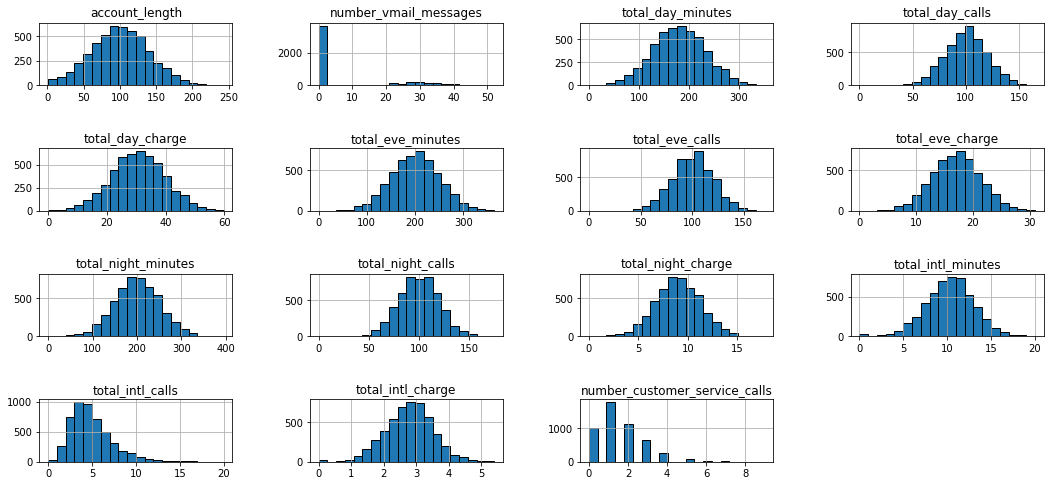

In [13]:
# Análise dos dados numéricos
columns=dataset_num.columns[:16]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in zip(columns,range(length)):
    plt.subplot((length/2),4,j+1)
    plt.subplots_adjust(wspace=0.4,hspace=1.0)
    dataset_num[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

#Muitas das variáveis já apresentam distribuição normal antes do processo de normalização, porém o processo será realizado.

account_length                       AxesSubplot(0.125,0.71587;0.168478x0.16413)
number_vmail_messages             AxesSubplot(0.327174,0.71587;0.168478x0.16413)
total_day_minutes                 AxesSubplot(0.529348,0.71587;0.168478x0.16413)
total_day_calls                   AxesSubplot(0.731522,0.71587;0.168478x0.16413)
total_day_charge                    AxesSubplot(0.125,0.518913;0.168478x0.16413)
total_eve_minutes                AxesSubplot(0.327174,0.518913;0.168478x0.16413)
total_eve_calls                  AxesSubplot(0.529348,0.518913;0.168478x0.16413)
total_eve_charge                 AxesSubplot(0.731522,0.518913;0.168478x0.16413)
total_night_minutes                 AxesSubplot(0.125,0.321957;0.168478x0.16413)
total_night_calls                AxesSubplot(0.327174,0.321957;0.168478x0.16413)
total_night_charge               AxesSubplot(0.529348,0.321957;0.168478x0.16413)
total_intl_minutes               AxesSubplot(0.731522,0.321957;0.168478x0.16413)
total_intl_calls            

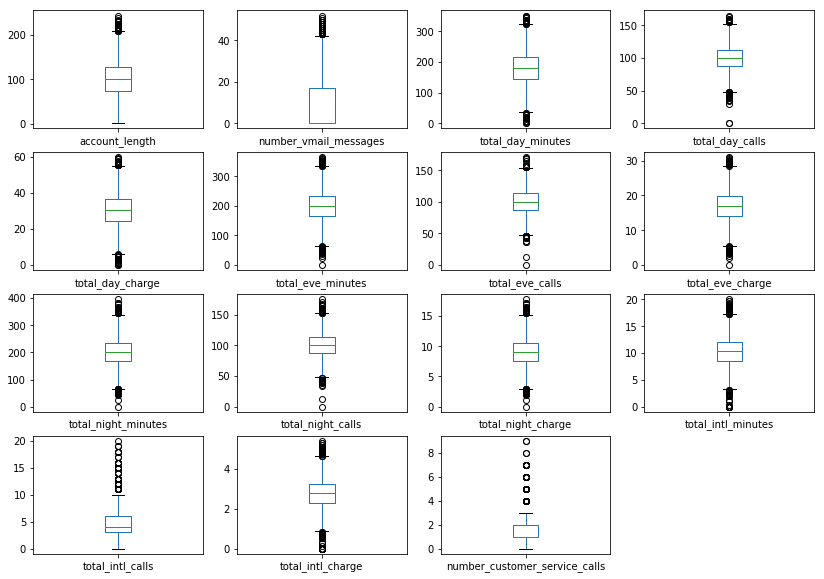

In [14]:
#Boxplot para melhor visualização dos outliers

dataset_num.plot(kind= 'box' , subplots=True, layout=(4,4),figsize=(14,10))

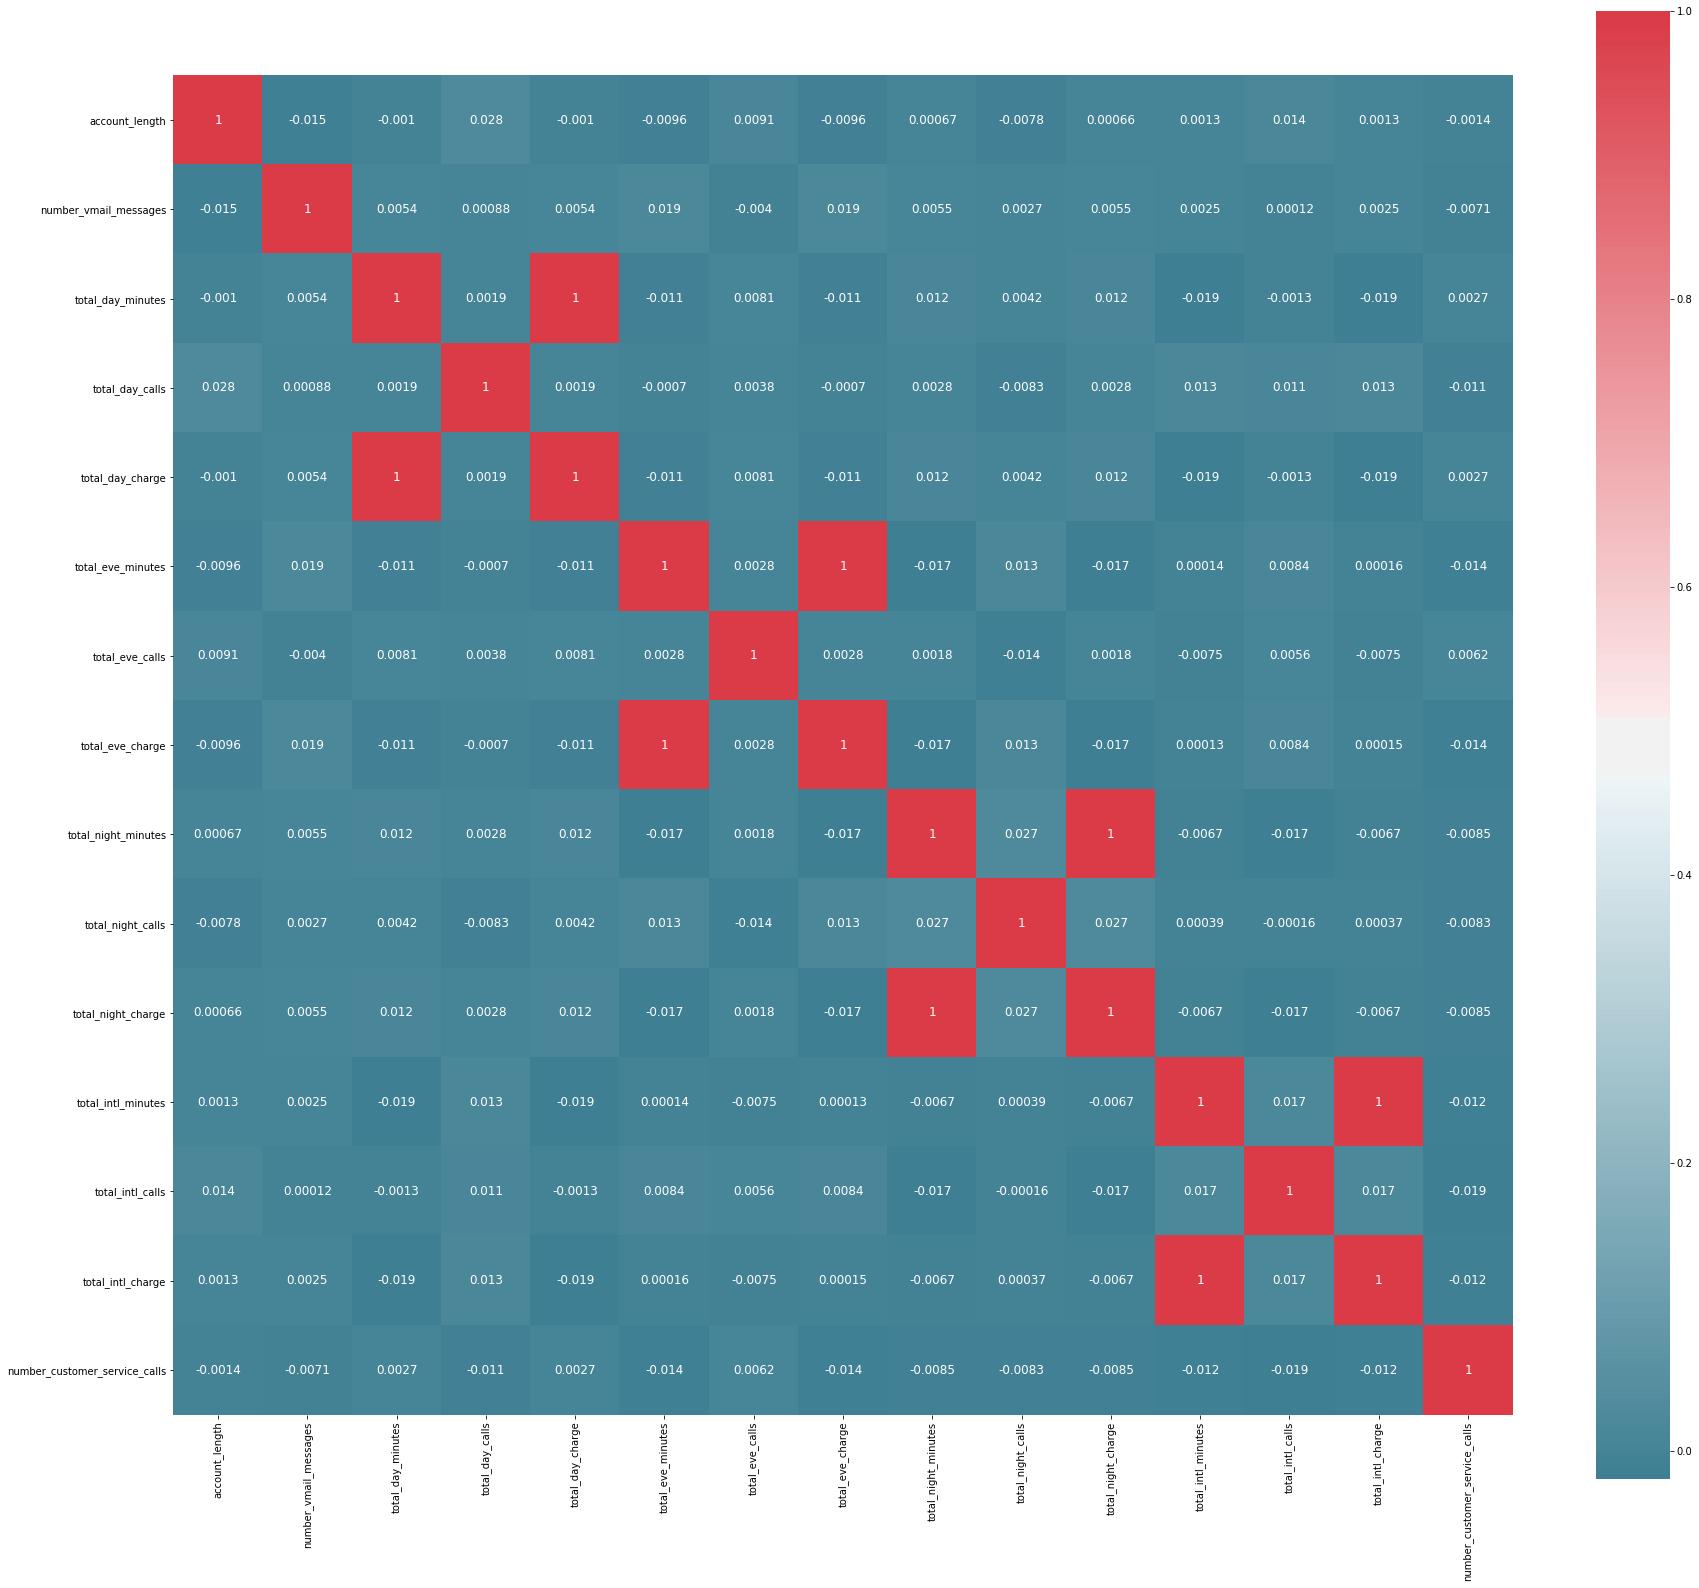

In [15]:
#Correlação das variáveis numéricas

import seaborn as sns

corr = dataset_num.corr()
_ , ax = plt.subplots( figsize =( 30 , 30 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
_ = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = {'fontsize' : 12 })


In [16]:
#Correlação perfeita entre as variáveis _charge e _minutes, caracterizando colinearidade. Remoção das colunas '...._charge'

dataset=dataset.drop(dataset.columns[[8,11,14,17]], axis=1)
dataset.head()


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,no


In [17]:
dataset.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_eve_minutes                float64
total_eve_calls                    int64
total_night_minutes              float64
total_night_calls                  int64
total_intl_minutes               float64
total_intl_calls                   int64
number_customer_service_calls      int64
churn                             object
dtype: object

Text(0.5, 1.0, 'Distribuição do código de área dos clientes')

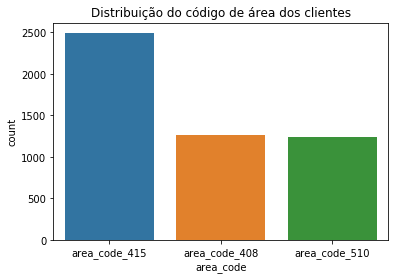

In [18]:
#Análise das variáveis categóricas

sns.countplot(x='area_code',data=dataset)
plt.title('Distribuição do código de área dos clientes')

Text(0.5, 1.0, 'Distribuição dos clientes que possuem plano internacional')

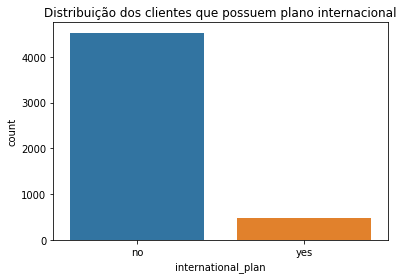

In [19]:
sns.countplot(x='international_plan',data=dataset)
plt.title('Distribuição dos clientes que possuem plano internacional')

Text(0.5, 1.0, 'Distribuição dos clientes que possuem plano com voicemail')

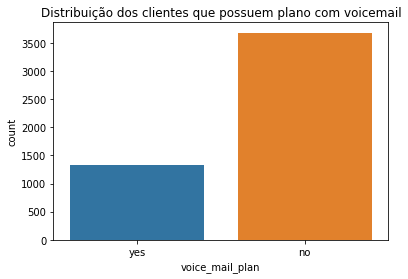

In [20]:
sns.countplot(x='voice_mail_plan',data=dataset)
plt.title('Distribuição dos clientes que possuem plano com voicemail')

In [21]:
dataset["state"].value_counts()

#O estado de maior frequencia no Dataframe é WV, com 158 clientes.

#Gráficos não foram plotados devido ao alto número de labels

WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
OR    114
NY    114
NJ    112
UT    112
WI    106
MA    103
MI    103
ME    103
MD    102
VT    101
MT     99
KY     99
MS     99
CT     99
KS     99
RI     99
WA     98
IN     98
CO     96
NH     95
DE     94
MO     93
AR     92
NM     91
NC     91
SC     91
FL     90
NV     90
OK     90
AZ     89
TN     89
IL     88
NE     88
ND     88
DC     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK     72
IA     69
CA     52
Name: state, dtype: int64

In [22]:
#Verificando valores NA, 0, missing etc..

dataset.isnull().sum().sort_values(ascending = False)

churn                            0
number_customer_service_calls    0
total_intl_calls                 0
total_intl_minutes               0
total_night_calls                0
total_night_minutes              0
total_eve_calls                  0
total_eve_minutes                0
total_day_calls                  0
total_day_minutes                0
number_vmail_messages            0
voice_mail_plan                  0
international_plan               0
area_code                        0
account_length                   0
state                            0
dtype: int64

In [23]:
(dataset==0).sum()

#Nestas variáveis, os zeros são plausíveis.

state                               0
account_length                      0
area_code                           0
international_plan                  0
voice_mail_plan                     0
number_vmail_messages            3678
total_day_minutes                   2
total_day_calls                     2
total_eve_minutes                   1
total_eve_calls                     1
total_night_minutes                 1
total_night_calls                   1
total_intl_minutes                 24
total_intl_calls                   24
number_customer_service_calls    1023
churn                               0
dtype: int64

In [24]:
#Normalizando as colunas numéricas
from sklearn.preprocessing import Normalizer

X = dataset.select_dtypes(include=['int64', 'float'])

# Gerando os dados normalizados
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

df_numnorm = pd.DataFrame(normalizedX)

df_numnorm.head()


,0,1,2,3,4,5,6,7,8,9,10
0,0.275142,0.053739,0.569846,0.236450,0.424321,0.212805,0.525995,0.195609,0.021495,0.006449,0.002150
1,0.253811,0.061674,0.383326,0.291764,0.463739,0.244323,0.603454,0.244323,0.032497,0.007116,0.002372
2,0.347726,0.000000,0.617785,0.289349,0.307624,0.279196,0.412703,0.263967,0.030965,0.012691,0.000000
3,0.209934,0.000000,0.748266,0.177444,0.154702,0.219931,0.492096,0.222430,0.016495,0.017495,0.004998
4,0.205845,0.000000,0.457525,0.310140,0.407024,0.334841,0.512965,0.332096,0.027720,0.008234,0.008234


In [25]:
X.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,3


In [26]:
#Colocando nome nas colunas novamente
df_numnorm = df_numnorm.rename(columns ={0: 'account_length', 1: 'number_vmail_messages', 2:'total_day_minutes', 3:'total_day_calls', 4:'total_eve_minutes', 5:'total_eve_calls', 6:'total_night_minutes', 7:'total_night_calls', 8:'total_intl_minutes', 9:'total_intl_calls', 10:'number_customer_service_calls'})
df_numnorm.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,0.275142,0.053739,0.569846,0.236450,0.424321,0.212805,0.525995,0.195609,0.021495,0.006449,0.002150
1,0.253811,0.061674,0.383326,0.291764,0.463739,0.244323,0.603454,0.244323,0.032497,0.007116,0.002372
2,0.347726,0.000000,0.617785,0.289349,0.307624,0.279196,0.412703,0.263967,0.030965,0.012691,0.000000
3,0.209934,0.000000,0.748266,0.177444,0.154702,0.219931,0.492096,0.222430,0.016495,0.017495,0.004998
4,0.205845,0.000000,0.457525,0.310140,0.407024,0.334841,0.512965,0.332096,0.027720,0.008234,0.008234


In [27]:
#Criando dataframe com as variáveis categóricas para realizar a junção com o dataset numérico normalizado, construíndo
#assim um só dataframe novamente.

df_categ = dataset.select_dtypes(include=[object])
df_categ.head()

,state,area_code,international_plan,voice_mail_plan,churn
0,KS,area_code_415,no,yes,no
1,OH,area_code_415,no,yes,no
2,NJ,area_code_415,no,no,no
3,OH,area_code_408,yes,no,no
4,OK,area_code_415,yes,no,no


In [28]:
#Junção dos dataframes

df_final = pd.DataFrame(np.concatenate( (df_numnorm.values.astype(float), df_categ.values), axis=1 ) )

df_final.columns = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_eve_minutes','total_eve_calls','total_night_minutes','total_night_calls','total_intl_minutes','total_intl_calls','number_customer_service_calls','state','area_code','international_plan','voice_mail_plan','churn']

df_final.head()



,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,state,area_code,international_plan,voice_mail_plan,churn
0,0.275142,0.0537387,0.569846,0.23645,0.424321,0.212805,0.525995,0.195609,0.0214955,0.00644865,0.00214955,KS,area_code_415,no,yes,no
1,0.253811,0.0616738,0.383326,0.291764,0.463739,0.244323,0.603454,0.244323,0.0324973,0.0071162,0.00237207,OH,area_code_415,no,yes,no
2,0.347726,0,0.617785,0.289349,0.307624,0.279196,0.412703,0.263967,0.0309654,0.0126907,0,NJ,area_code_415,no,no,no
3,0.209934,0,0.748266,0.177444,0.154702,0.219931,0.492096,0.22243,0.0164948,0.0174945,0.00499844,OH,area_code_408,yes,no,no
4,0.205845,0,0.457525,0.31014,0.407024,0.334841,0.512965,0.332096,0.0277204,0.0082338,0.0082338,OK,area_code_415,yes,no,no


In [29]:
#Modificando o type das colunas numéricas

convert_dict = {'account_length':float,
                  'number_vmail_messages':float,'total_day_minutes':float,'total_day_calls':float
                ,'total_eve_minutes':float,'total_eve_calls':float,'total_night_minutes':float,
                'total_night_calls':float,'total_intl_minutes':float,'total_intl_calls':float,
                'number_customer_service_calls':float}


df_final = df_final.astype(convert_dict) 
print(df_final.dtypes) 

account_length                   float64
number_vmail_messages            float64
total_day_minutes                float64
total_day_calls                  float64
total_eve_minutes                float64
total_eve_calls                  float64
total_night_minutes              float64
total_night_calls                float64
total_intl_minutes               float64
total_intl_calls                 float64
number_customer_service_calls    float64
state                             object
area_code                         object
international_plan                object
voice_mail_plan                   object
churn                             object
dtype: object


In [30]:
#Conferindo o shape dos dados

df_numnorm.shape

(5000, 11)

In [31]:
df_categ.shape

(5000, 5)

In [32]:
df_final.dtypes

#Tudo ok.

account_length                   float64
number_vmail_messages            float64
total_day_minutes                float64
total_day_calls                  float64
total_eve_minutes                float64
total_eve_calls                  float64
total_night_minutes              float64
total_night_calls                float64
total_intl_minutes               float64
total_intl_calls                 float64
number_customer_service_calls    float64
state                             object
area_code                         object
international_plan                object
voice_mail_plan                   object
churn                             object
dtype: object

In [33]:
#Tratamento das variáveis categóricas

#Função para transformar a variável Y em numérica
def y_numerico(x):
    if x=='no':
        return 0
    if x=='yes':
        return 1
    

   

In [34]:
df_final['churn'] = df_final['churn'].apply(y_numerico)
df_final.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,state,area_code,international_plan,voice_mail_plan,churn
0,0.275142,0.053739,0.569846,0.236450,0.424321,0.212805,0.525995,0.195609,0.021495,0.006449,0.002150,KS,area_code_415,no,yes,0
1,0.253811,0.061674,0.383326,0.291764,0.463739,0.244323,0.603454,0.244323,0.032497,0.007116,0.002372,OH,area_code_415,no,yes,0
2,0.347726,0.000000,0.617785,0.289349,0.307624,0.279196,0.412703,0.263967,0.030965,0.012691,0.000000,NJ,area_code_415,no,no,0
3,0.209934,0.000000,0.748266,0.177444,0.154702,0.219931,0.492096,0.222430,0.016495,0.017495,0.004998,OH,area_code_408,yes,no,0
4,0.205845,0.000000,0.457525,0.310140,0.407024,0.334841,0.512965,0.332096,0.027720,0.008234,0.008234,OK,area_code_415,yes,no,0


In [35]:
df_final['churn'] = df_final.churn.astype('category')
df_final['international_plan'] = df_final.international_plan.astype('category')
df_final['area_code'] = df_final.area_code.astype('category')
df_final['voice_mail_plan'] = df_final.voice_mail_plan.astype('category')
df_final['state'] = df_final.state.astype('category')

df_final.dtypes

account_length                    float64
number_vmail_messages             float64
total_day_minutes                 float64
total_day_calls                   float64
total_eve_minutes                 float64
total_eve_calls                   float64
total_night_minutes               float64
total_night_calls                 float64
total_intl_minutes                float64
total_intl_calls                  float64
number_customer_service_calls     float64
state                            category
area_code                        category
international_plan               category
voice_mail_plan                  category
churn                            category
dtype: object

In [36]:
#TRATANDO AS VARIÁVEIS CATEGÓRICAS (consulta futura https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159)

#Usando método label encoding para variável categórica de alta cardinalidade (state)

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

df_final['state'] = lb_make.fit_transform(df_final['state'])

df_final['state'] = df_final['state'].astype('category')

df_final.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,state,area_code,international_plan,voice_mail_plan,churn
0,0.275142,0.053739,0.569846,0.236450,0.424321,0.212805,0.525995,0.195609,0.021495,0.006449,0.002150,16,area_code_415,no,yes,0
1,0.253811,0.061674,0.383326,0.291764,0.463739,0.244323,0.603454,0.244323,0.032497,0.007116,0.002372,35,area_code_415,no,yes,0
2,0.347726,0.000000,0.617785,0.289349,0.307624,0.279196,0.412703,0.263967,0.030965,0.012691,0.000000,31,area_code_415,no,no,0
3,0.209934,0.000000,0.748266,0.177444,0.154702,0.219931,0.492096,0.222430,0.016495,0.017495,0.004998,35,area_code_408,yes,no,0
4,0.205845,0.000000,0.457525,0.310140,0.407024,0.334841,0.512965,0.332096,0.027720,0.008234,0.008234,36,area_code_415,yes,no,0


In [37]:
#One hot encoding (OHE) nas demais variáveis categóricas (baixa cardinalidade)

#criando o df temporário
df_OHE = df_final.drop(df_final.columns[[0,1,2,3,4,5,6,7,8,9,10,11,15]], axis=1)

df_OHE.head()

,area_code,international_plan,voice_mail_plan
0,area_code_415,no,yes
1,area_code_415,no,yes
2,area_code_415,no,no
3,area_code_408,yes,no
4,area_code_415,yes,no


In [38]:
#Aplicando OHE

In [39]:
df_OHE = pd.get_dummies(df_OHE)
df_OHE.head()

,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0,1,0,1,0,0,1
1,0,1,0,1,0,0,1
2,0,1,0,1,0,1,0
3,1,0,0,0,1,1,0
4,0,1,0,0,1,1,0


In [40]:
#Novo dataset 100% tratado e convertido

#Retirando as colunas categóricas sem OHE
df_finalutil = df_final.drop(df_final.columns[[12,13,14]], axis=1)
df_finalutil.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,state,churn
0,0.275142,0.053739,0.569846,0.236450,0.424321,0.212805,0.525995,0.195609,0.021495,0.006449,0.002150,16,0
1,0.253811,0.061674,0.383326,0.291764,0.463739,0.244323,0.603454,0.244323,0.032497,0.007116,0.002372,35,0
2,0.347726,0.000000,0.617785,0.289349,0.307624,0.279196,0.412703,0.263967,0.030965,0.012691,0.000000,31,0
3,0.209934,0.000000,0.748266,0.177444,0.154702,0.219931,0.492096,0.222430,0.016495,0.017495,0.004998,35,0
4,0.205845,0.000000,0.457525,0.310140,0.407024,0.334841,0.512965,0.332096,0.027720,0.008234,0.008234,36,0


In [41]:
#Colocando as colunas categóricas com OHE

df_tratado = pd.concat([df_OHE, df_finalutil], axis = 1)

df_tratado.head()


,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,state,churn
0,0,1,0,1,0,0,1,0.275142,0.053739,0.569846,0.236450,0.424321,0.212805,0.525995,0.195609,0.021495,0.006449,0.002150,16,0
1,0,1,0,1,0,0,1,0.253811,0.061674,0.383326,0.291764,0.463739,0.244323,0.603454,0.244323,0.032497,0.007116,0.002372,35,0
2,0,1,0,1,0,1,0,0.347726,0.000000,0.617785,0.289349,0.307624,0.279196,0.412703,0.263967,0.030965,0.012691,0.000000,31,0
3,1,0,0,0,1,1,0,0.209934,0.000000,0.748266,0.177444,0.154702,0.219931,0.492096,0.222430,0.016495,0.017495,0.004998,35,0
4,0,1,0,0,1,1,0,0.205845,0.000000,0.457525,0.310140,0.407024,0.334841,0.512965,0.332096,0.027720,0.008234,0.008234,36,0


In [42]:
#Com os dados tratados, é hora de dividir o dataset na composição do início do projeto (Treino e teste)

dataset_treino = df_tratado[0:3333] #Informação das linhas obtidas com o comando .shape no início do projeto
dataset_teste = df_tratado[3333:5000]


In [43]:
#Balanceando as categorias

df_tratado.groupby('churn').size()

churn
0    4293
1     707
dtype: int64

In [44]:
#Divisão do dataset de treino

X_train = dataset_treino.iloc[:,0:19] 
Y_train = dataset_treino.iloc[:,19]

X_train.head()

,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,state
0,0,1,0,1,0,0,1,0.275142,0.053739,0.569846,0.236450,0.424321,0.212805,0.525995,0.195609,0.021495,0.006449,0.002150,16
1,0,1,0,1,0,0,1,0.253811,0.061674,0.383326,0.291764,0.463739,0.244323,0.603454,0.244323,0.032497,0.007116,0.002372,35
2,0,1,0,1,0,1,0,0.347726,0.000000,0.617785,0.289349,0.307624,0.279196,0.412703,0.263967,0.030965,0.012691,0.000000,31
3,1,0,0,0,1,1,0,0.209934,0.000000,0.748266,0.177444,0.154702,0.219931,0.492096,0.222430,0.016495,0.017495,0.004998,35
4,0,1,0,0,1,1,0,0.205845,0.000000,0.457525,0.310140,0.407024,0.334841,0.512965,0.332096,0.027720,0.008234,0.008234,36


In [45]:
#Técnica SMOTE para balanceamento de categorias

!pip install imblearn



In [46]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=13)
X_train, Y_train = smt.fit_sample(X_train, Y_train)

np.bincount(Y_train)

#Tudo ok, podemos agora prosseguir para a etapa de Machine Learning.

array([2850, 2850], dtype=int64)

LR: 0.629298 (0.039104)


C:\Users\AG\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\AG\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\AG\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\AG\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\AG\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\AG\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\AG\Anaconda3\lib\site-packages\

LDA: 0.698421 (0.028596)
NB: 0.751579 (0.056898)
KNN: 0.814211 (0.073811)
CART: 0.826842 (0.024650)
SVM: 0.472105 (0.086120)


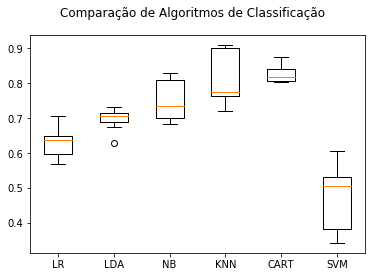

In [47]:
#Comparando o desempnho dos algoritmos de classificação utilizando a técnica de cross validation.

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



# Separando o array em componentes de input e output
X_train #input
Y_train #output

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X_train)
seed = 7

# Preparando os modelo
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = model_selection.KFold(n_splits = num_folds, random_state = seed)
    cv_results = model_selection.cross_val_score(modelo, X_train, Y_train, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [48]:
#O modelo CART foi o mais preciso durante o treinamento. Sendo assim, o mesmo foi escolhido para prever os dados de teste.
#Criando o modelo isolado

num_folds = 10
num_instances = len(X_train)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo_def = DecisionTreeClassifier()
resultado = model_selection.cross_val_score(modelo_def, X_train, Y_train, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia: %.3f%% (%.3f%%)" % (resultado.mean()*100.0, resultado.std() * 100.0))

Acurácia: 83.982% (1.428%)


In [49]:
#Testando o modelo

from sklearn.model_selection import cross_val_predict
X_test = dataset_teste.drop(['churn'], axis=1)
Y_test = dataset_teste['churn'].astype(float) 

resultado_def = cross_val_predict(modelo_def, X_test, Y_test, cv=10)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Acurácia nos dados de teste: %s' % accuracy_score(Y_test, resultado_def))
print(confusion_matrix(Y_test, resultado_def))
print(classification_report(Y_test, resultado_def))

Acurácia nos dados de teste: 0.8518296340731853
[[1314  129]
 [ 118  106]]
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91      1443
         1.0       0.45      0.47      0.46       224

   micro avg       0.85      0.85      0.85      1667
   macro avg       0.68      0.69      0.69      1667
weighted avg       0.85      0.85      0.85      1667

